In [1]:
from StockDataReader import StockDataReader

Make sure you have installed the following packages: yahoo_fin, apscheduler

### 1. periodically get real-time market data

In [2]:
reader=StockDataReader("./data")

In [3]:
reporter=reader.getPeriodicReporter()

In [4]:
tickerList=["AAPL","MSFT","ORCL","JPM"]

get data every 20 seconds

In [5]:
reporter.addJob(20,tickerList)

      Best Ask Price  Best Ask Amount  Best Bid Price  Best Bid Amount  \
AAPL          122.05           3100.0          122.03           3000.0   
MSFT          214.12           1800.0          214.00           1300.0   
ORCL           59.96           1800.0           59.89           2900.0   
JPM           122.08           1100.0          122.17           1200.0   

      Quote Price    Open  Previous Close      Volume  
AAPL       122.25  122.60          122.94  70143416.0  
MSFT       214.36  214.22          214.24  22664089.0  
ORCL        59.96   59.31           59.27  10872210.0  
JPM        122.34  122.48          121.24  13583026.0  
      Best Ask Price  Best Ask Amount  Best Bid Price  Best Bid Amount  \
AAPL          122.05           3100.0          122.03           3000.0   
MSFT          214.12           1800.0          214.00           1300.0   
ORCL           59.96           1800.0           59.89           2900.0   
JPM           122.08           1100.0          122.17

get the information of the current reporter

In [6]:
reporter.getJob()

Jobstore default:
    StockDataReader.getCurrentMarketData (trigger: interval[0:00:20], next run at: 2020-12-04 18:55:58 EST)


close the reporter

In [7]:
reporter.shutDown()

### 2 get real-time market data at a specific time

In [8]:
reporter=reader.getSpecificTimeReporter()

In [9]:
reporter.addJob(18,56,20,tickerList)

In [10]:
reporter.getAllJobs()

Jobstore default:
    StockDataReader.getCurrentMarketData (trigger: cron[hour='18', minute='56', second='20'], next run at: 2020-12-04 18:56:20 EST)
      Best Ask Price  Best Ask Amount  Best Bid Price  Best Bid Amount  \
AAPL          122.05           3100.0          122.03           3000.0   
MSFT          214.12           1800.0          214.00           1300.0   
ORCL           59.96           1800.0           59.89           2900.0   
JPM           122.08           1100.0          122.17           1200.0   

      Quote Price    Open  Previous Close      Volume  
AAPL       122.25  122.60          122.94  70143416.0  
MSFT       214.36  214.22          214.24  22664089.0  
ORCL        59.96   59.31           59.27  10872210.0  
JPM        122.34  122.48          121.24  13583026.0  


after get a new update, the time of next run changes

In [11]:
reporter.getAllJobs()

Jobstore default:
    StockDataReader.getCurrentMarketData (trigger: cron[hour='18', minute='56', second='20'], next run at: 2020-12-05 18:56:20 EST)


In [12]:
reporter.addJob(18,57,0,["IBM"])

There can be multiple jobs for the reporter

In [13]:
reporter.getAllJobs()

Jobstore default:
    StockDataReader.getCurrentMarketData (trigger: cron[hour='18', minute='57', second='0'], next run at: 2020-12-04 18:57:00 EST)
    StockDataReader.getCurrentMarketData (trigger: cron[hour='18', minute='56', second='20'], next run at: 2020-12-05 18:56:20 EST)
     Best Ask Price  Best Ask Amount  Best Bid Price  Best Bid Amount  \
IBM          127.14            800.0          127.18           1300.0   

     Quote Price    Open  Previous Close     Volume  
IBM        127.2  123.97          123.61  5240636.0  


after get a new update, the time of next run changes

In [14]:
reporter.getAllJobs()

Jobstore default:
    StockDataReader.getCurrentMarketData (trigger: cron[hour='18', minute='56', second='20'], next run at: 2020-12-05 18:56:20 EST)
    StockDataReader.getCurrentMarketData (trigger: cron[hour='18', minute='57', second='0'], next run at: 2020-12-05 18:57:00 EST)


In [15]:
reporter.shutDown()

### 3.get historical data from yahoo finance

we also save the downloaded data at local

In [16]:
test_Data=reader.getHistoricalData(tickerList=tickerList,startDate="2016-03-05",endDate="2019-12-20",update=True)

In [17]:
test_Data

{'AAPL': {'data':                  open       high        low      close   adjclose     volume  \
  2016-03-07  25.597500  25.707500  25.240000  25.467501  23.530294  143315600   
  2016-03-08  25.195000  25.440001  25.100000  25.257500  23.336264  126247600   
  2016-03-09  25.327499  25.395000  25.067499  25.280001  23.357054  108806800   
  2016-03-10  25.352501  25.559999  25.037500  25.292500  23.368603  134054400   
  2016-03-11  25.559999  25.570000  25.375000  25.565001  23.620375  109632800   
  ...               ...        ...        ...        ...        ...        ...   
  2019-12-13  67.864998  68.824997  67.732498  68.787498  67.644707  133587600   
  2019-12-16  69.250000  70.197502  69.245003  69.964996  68.802635  128186000   
  2019-12-17  69.892502  70.442497  69.699997  70.102501  68.937851  114158400   
  2019-12-18  69.949997  70.474998  69.779999  69.934998  68.773132  116028400   
  2019-12-19  69.875000  70.294998  69.737503  70.004997  68.841965   98369200   


Check data is already at local

In [18]:
import os
print(os.path.isfile("./data/AAPL.csv"))
print(os.path.isfile("./data/JPM.csv"))
print(os.path.isfile("./data/ORCL.csv"))
print(os.path.isfile("./data/MSFT.csv"))

True
True
True
True


read from local

In [19]:
test_Data2=reader.getHistoricalData(tickerList=tickerList,startDate="2016-03-05",endDate="2019-12-20",readFromLocal=True)

try to read not existed file

In [20]:
reader.getHistoricalData(["ABCD"],readFromLocal=True)

C:\Users\liyf4\JupyterNotebook\StockDataReader.py:290: UserWarning: ABCD's data not found!
  warnings.warn("{}'s data not found!".format(ticker))


{}

### 3 organise data

column=name of values, index=date

In [21]:
data1=reader.transform_Date_Value("AAPL",readFromLocal=True)

In [22]:
data1

,open,high,low,close,adjclose,volume,ticker
2016-03-07,25.597500,25.707500,25.240000,25.467501,23.530294,143315600,AAPL
2016-03-08,25.195000,25.440001,25.100000,25.257500,23.336264,126247600,AAPL
2016-03-09,25.327499,25.395000,25.067499,25.280001,23.357054,108806800,AAPL
2016-03-10,25.352501,25.559999,25.037500,25.292500,23.368603,134054400,AAPL
2016-03-11,25.559999,25.570000,25.375000,25.565001,23.620375,109632800,AAPL
...,...,...,...,...,...,...,...
2019-12-13,67.864998,68.824997,67.732498,68.787498,67.644707,133587600,AAPL
2019-12-16,69.250000,70.197502,69.245003,69.964996,68.802635,128186000,AAPL
2019-12-17,69.892502,70.442497,69.699997,70.102501,68.937851,114158400,AAPL
2019-12-18,69.949997,70.474998,69.779999,69.934998,68.773132,116028400,AAPL


column=ticker, index=date

In [23]:
data2_close=reader.transform_Date_Ticker(test_Data,"close")

In [24]:
data2_close

,AAPL,MSFT,ORCL,JPM
2016-03-07,25.467501,51.029999,38.360001,59.939999
2016-03-08,25.257500,51.650002,38.150002,58.779999
2016-03-09,25.280001,52.840000,38.480000,59.119999
2016-03-10,25.292500,52.049999,38.049999,58.610001
2016-03-11,25.565001,53.070000,38.950001,59.340000
...,...,...,...,...
2019-12-13,68.787498,154.529999,54.509998,136.809998
2019-12-16,69.964996,155.529999,53.990002,137.339996
2019-12-17,70.102501,154.690002,52.840000,138.179993
2019-12-18,69.934998,154.369995,53.389999,138.039993


In [25]:
data2_volume=reader.transform_Date_Ticker(test_Data,value="volume")

In [26]:
data2_volume

,AAPL,MSFT,ORCL,JPM
2016-03-07,143315600,38407800,13011000,12832400
2016-03-08,126247600,33835100,12384400,14132900
2016-03-09,108806800,28251600,16786500,13238800
2016-03-10,134054400,38387800,17620600,21139200
2016-03-11,109632800,32275700,13143300,21055000
...,...,...,...,...
2019-12-13,133587600,23845400,21427700,10592100
2019-12-16,128186000,24144200,19951000,11372000
2019-12-17,114158400,25425600,19778400,11546800
2019-12-18,116028400,24129200,14123100,10381500


column=name of values, index=ticker

In [27]:
data3=reader.transform_Ticker_Value(test_Data,"2019-12-16")

In [28]:
data3

,open,high,low,close,adjclose,volume
AAPL,69.250000,70.197502,69.245003,69.964996,68.802635,128186000
MSFT,155.110001,155.899994,154.820007,155.529999,153.899643,24144200
ORCL,54.599998,54.980000,53.700001,53.990002,53.056564,19951000
JPM,138.380005,138.839996,137.320007,137.339996,132.527283,11372000


try to get data out of date range (raise error)

In [29]:
reader.transform_Ticker_Value(test_Data,"2020-12-04")

ValueError: inout data of {} does not contain the data on the required date!

try to get data at a non-trading date (raise error)

In [30]:
reader.transform_Ticker_Value(test_Data,"2019-12-14")

ValueError: date is not a valid trading date!

### 4. resample data

we use following data

In [31]:
data2_close

,AAPL,MSFT,ORCL,JPM
2016-03-07,25.467501,51.029999,38.360001,59.939999
2016-03-08,25.257500,51.650002,38.150002,58.779999
2016-03-09,25.280001,52.840000,38.480000,59.119999
2016-03-10,25.292500,52.049999,38.049999,58.610001
2016-03-11,25.565001,53.070000,38.950001,59.340000
...,...,...,...,...
2019-12-13,68.787498,154.529999,54.509998,136.809998
2019-12-16,69.964996,155.529999,53.990002,137.339996
2019-12-17,70.102501,154.690002,52.840000,138.179993
2019-12-18,69.934998,154.369995,53.389999,138.039993


resample to weely data

In [32]:
data4_resample=reader.transform_resample(data2_close,"5B",value="close")

In [33]:
data4_resample

,AAPL,MSFT,ORCL,JPM
2016-03-07,25.565001,53.070000,38.950001,59.340000
2016-03-14,26.480000,53.490002,41.480000,60.480000
2016-03-21,26.417500,54.209999,40.970001,59.480000
2016-03-28,27.497499,55.570000,41.160000,59.869999
2016-04-04,27.165001,54.419998,40.360001,57.740002
...,...,...,...,...
2019-11-18,65.445000,149.589996,56.389999,130.789993
2019-11-25,66.812500,151.380005,56.139999,131.759995
2019-12-02,67.677498,151.750000,54.830002,135.039993
2019-12-09,68.787498,154.529999,54.509998,136.809998


In [34]:
data4_resample_volume=reader.transform_resample(data2_volume,"5B",value="volume")

In [35]:
data4_resample_volume

,AAPL,MSFT,ORCL,JPM
2016-03-07,622057200,171158000,72945800,82398300
2016-03-14,728292800,172729500,137807200,90746400
2016-03-21,479134400,87128800,54868600,49307000
2016-03-28,591860000,114717400,59380400,70722400
2016-04-04,582890400,100782100,52720600,70134000
...,...,...,...,...
2019-11-18,455825200,105644400,37653800,45229600
2019-11-25,301081200,74202700,32324000,32879100
2019-12-02,456599200,103331700,57360500,49053100
2019-12-09,568117600,100477600,71716900,49352500


now we use following data:

In [36]:
data1

,open,high,low,close,adjclose,volume,ticker
2016-03-07,25.597500,25.707500,25.240000,25.467501,23.530294,143315600,AAPL
2016-03-08,25.195000,25.440001,25.100000,25.257500,23.336264,126247600,AAPL
2016-03-09,25.327499,25.395000,25.067499,25.280001,23.357054,108806800,AAPL
2016-03-10,25.352501,25.559999,25.037500,25.292500,23.368603,134054400,AAPL
2016-03-11,25.559999,25.570000,25.375000,25.565001,23.620375,109632800,AAPL
...,...,...,...,...,...,...,...
2019-12-13,67.864998,68.824997,67.732498,68.787498,67.644707,133587600,AAPL
2019-12-16,69.250000,70.197502,69.245003,69.964996,68.802635,128186000,AAPL
2019-12-17,69.892502,70.442497,69.699997,70.102501,68.937851,114158400,AAPL
2019-12-18,69.949997,70.474998,69.779999,69.934998,68.773132,116028400,AAPL


In [37]:
data5=reader.transform_resample(data1,"5B")

In [38]:
data5

,open,close,adjclose,high,low,volume
2016-03-07,25.597500,25.565001,23.620375,25.707500,25.037500,622057200
2016-03-14,25.477501,26.480000,24.465771,26.625000,25.445000,728292800
2016-03-21,26.482500,26.417500,24.408028,26.912500,26.222500,479134400
2016-03-28,26.500000,27.497499,25.405874,27.605000,26.219999,591860000
2016-04-04,27.605000,27.165001,25.098667,28.047501,27.030001,582890400
...,...,...,...,...,...,...
2019-11-18,66.449997,65.445000,64.357727,67.000000,65.099998,455825200
2019-11-25,65.677498,66.812500,65.702515,67.000000,65.625000,301081200
2019-12-02,66.817497,67.677498,66.553131,67.750000,64.072502,456599200
2019-12-09,67.500000,68.787498,67.644707,68.824997,66.227501,568117600


### 5.get stock statistics

In [39]:
data6_stats=reader.getStockStatistics(data2_close)

In [40]:
data6_stats

,AAPL,MSFT,ORCL,JPM
count,955.000000,955.000000,955.000000,955.000000
mean,0.001173,0.001260,0.000427,0.000944
std,0.015049,0.013509,0.012949,0.012300
min,-0.099607,-0.071710,-0.094321,-0.069477
25%,-0.005564,-0.004778,-0.004746,-0.005280
50%,0.000901,0.001069,0.000974,0.000549
75%,0.008782,0.008063,0.006160,0.007197
max,0.070422,0.075705,0.085690,0.046879
skew,-0.278664,-0.027101,-0.528375,-0.089709
kurt,4.972048,4.334636,10.184612,2.848424


### 6. get some index:

Moving Average Index

In [41]:
data7_movingaverage=reader.getMovingAverage(data2_close,20)

In [42]:
data7_movingaverage

,AAPL,MSFT,ORCL,JPM
2016-04-04,26.365000,53.7770,40.0940,59.440500
2016-04-05,26.464250,53.9535,40.2025,59.361500
2016-04-06,26.588375,54.1270,40.3325,59.363000
2016-04-07,26.681125,54.2080,40.4070,59.273000
2016-04-08,26.774750,54.3265,40.5225,59.229500
...,...,...,...,...
2019-12-13,66.578750,150.9350,55.7960,132.383498
2019-12-16,66.755000,151.2130,55.6745,132.773998
2019-12-17,66.921375,151.4305,55.5070,133.151998
2019-12-18,67.089500,151.6295,55.3630,133.524998


EMA Index

In [43]:
data7_EMA=reader.getEMA(data2_close)

In [44]:
data7_EMA

,AAPL,MSFT,ORCL,JPM
2016-03-07,NaN,NaN,NaN,NaN
2016-03-08,NaN,NaN,NaN,NaN
2016-03-09,NaN,NaN,NaN,NaN
2016-03-10,NaN,NaN,NaN,NaN
2016-03-11,NaN,NaN,NaN,NaN
...,...,...,...,...
2019-12-13,66.408956,150.421418,55.596845,132.637571
2019-12-16,66.747626,150.907950,55.443812,133.085421
2019-12-17,67.067138,151.268145,55.195830,133.570618
2019-12-18,67.340268,151.563560,55.023846,133.996273


MACD Index

In [45]:
data7_MACD=reader.getMACD(data2_close)

In [46]:
data7_MACD

,AAPL,MSFT,ORCL,JPM
2016-03-07,NaN,NaN,NaN,NaN
2016-03-08,NaN,NaN,NaN,NaN
2016-03-09,NaN,NaN,NaN,NaN
2016-03-10,NaN,NaN,NaN,NaN
2016-03-11,NaN,NaN,NaN,NaN
...,...,...,...,...
2019-12-13,1.240062,2.005458,0.021023,2.257994
2019-12-16,1.266518,2.039828,-0.016015,2.318532
2019-12-17,1.308479,2.075214,-0.082508,2.386281
2019-12-18,1.352305,2.099547,-0.155013,2.447326


RSI Index

In [47]:
data7_RSI=reader.getRSI(data2_close,20)

In [48]:
data7_RSI

,AAPL,MSFT,ORCL,JPM
2016-03-07,NaN,NaN,NaN,NaN
2016-03-08,NaN,NaN,NaN,NaN
2016-03-09,NaN,NaN,NaN,NaN
2016-03-10,NaN,NaN,NaN,NaN
2016-03-11,NaN,NaN,NaN,NaN
...,...,...,...,...
2019-12-13,0.690731,0.755216,0.381553,0.700180
2019-12-16,0.739857,0.782266,0.342710,0.714690
2019-12-17,0.745083,0.709476,0.274422,0.736987
2019-12-18,0.725460,0.682727,0.343564,0.726528


### 7.make some plot

Plot Covariance Matrix

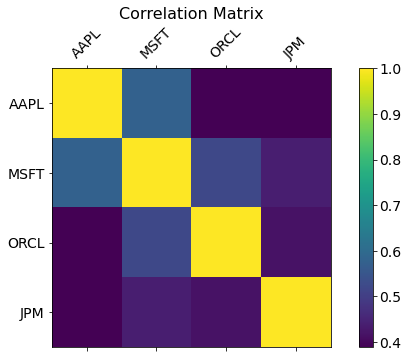

In [49]:
reader.plotCov(data2_close)

Plot Stock Tendency

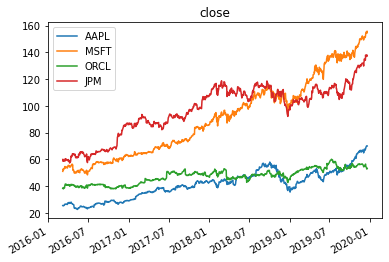

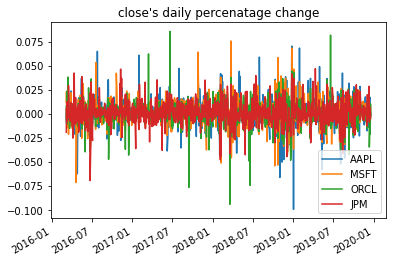

In [50]:
reader.plotTendency(data2_close,value="close")